<a href="https://colab.research.google.com/github/tylerpan98/Marketing-Response-Analytics-/blob/main/marketing_response_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
%cd /content/drive/MyDrive/marketing_analytics//

/content/drive/MyDrive/marketing_analytics


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('ifood_df.csv')

In [49]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [51]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [52]:
data = data.drop(columns=['Z_CostContact','Z_Revenue'], axis = 1)

In [53]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [54]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64

In [55]:
corr_matrix = data.corr()
corr_filtered = corr_matrix[(corr_matrix >= 0.6) | (corr_matrix <= -0.6)]
corr_filtered = corr_filtered[corr_filtered != 1.0]

print(corr_filtered)

                        Income  Kidhome  Teenhome  Recency  MntWines  \
Income                     NaN      NaN       NaN      NaN  0.730495   
Kidhome                    NaN      NaN       NaN      NaN       NaN   
Teenhome                   NaN      NaN       NaN      NaN       NaN   
Recency                    NaN      NaN       NaN      NaN       NaN   
MntWines              0.730495      NaN       NaN      NaN       NaN   
MntFruits                  NaN      NaN       NaN      NaN       NaN   
MntMeatProducts       0.702500      NaN       NaN      NaN       NaN   
MntFishProducts            NaN      NaN       NaN      NaN       NaN   
MntSweetProducts           NaN      NaN       NaN      NaN       NaN   
MntGoldProds               NaN      NaN       NaN      NaN       NaN   
NumDealsPurchases          NaN      NaN       NaN      NaN       NaN   
NumWebPurchases            NaN      NaN       NaN      NaN       NaN   
NumCatalogPurchases   0.710057      NaN       NaN      NaN  0.67

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif = pd.DataFrame()
    vif['variable'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

vif_data = calculate_vif(data)
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                variable       VIF
0                 Income  5.784030
1                Kidhome  1.940159
2               Teenhome  1.777842
3                Recency  1.072566
4               MntWines       inf
5              MntFruits       inf
6        MntMeatProducts       inf
7        MntFishProducts       inf
8       MntSweetProducts       inf
9           MntGoldProds       inf
10     NumDealsPurchases  1.759396
11       NumWebPurchases  2.082687
12   NumCatalogPurchases  3.225463
13     NumStorePurchases  2.600420
14     NumWebVisitsMonth  2.978350
15          AcceptedCmp3       inf
16          AcceptedCmp4       inf
17          AcceptedCmp5       inf
18          AcceptedCmp1       inf
19          AcceptedCmp2       inf
20              Complain  1.010950
21              Response  1.537912
22                   Age  1.327058
23         Customer_Days  1.387877
24      marital_Divorced       inf
25       marital_Married       inf
26        marital_Single       inf
27      marital_Toge

In [58]:
drop_features = ['MntTotal', 'MntRegularProds', 'AcceptedCmp3', 'education_2n Cycle', 'AcceptedCmpOverall', 'marital_Divorced']
data = data.drop(columns=drop_features, axis = 1)

vif_data = calculate_vif(data)
print(vif_data)

                variable        VIF
0                 Income  36.462198
1                Kidhome   3.179668
2               Teenhome   3.269998
3                Recency   4.137508
4               MntWines   6.693956
5              MntFruits   2.848822
6        MntMeatProducts   4.988606
7        MntFishProducts   3.223381
8       MntSweetProducts   2.841651
9           MntGoldProds   2.671989
10     NumDealsPurchases   4.379291
11       NumWebPurchases   6.732618
12   NumCatalogPurchases   5.989380
13     NumStorePurchases  10.944062
14     NumWebVisitsMonth  17.292067
15          AcceptedCmp4   1.477593
16          AcceptedCmp5   1.830694
17          AcceptedCmp1   1.481362
18          AcceptedCmp2   1.181920
19              Complain   1.018560
20              Response   1.697287
21                   Age  24.352076
22         Customer_Days  75.811240
23       marital_Married   4.651681
24        marital_Single   3.046520
25      marital_Together   3.433483
26         marital_Widow   1

In [59]:
categorical_columns = []
numerical_columns = []

for i in data.columns:
  if i == 'Response':
    continue
  elif len(sorted(data[i].unique())) <= 4:
    categorical_columns.append(i)
  else:
    numerical_columns.append(i)


In [60]:
categorical_columns

['Kidhome',
 'Teenhome',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']

In [61]:
numerical_columns

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'Customer_Days']

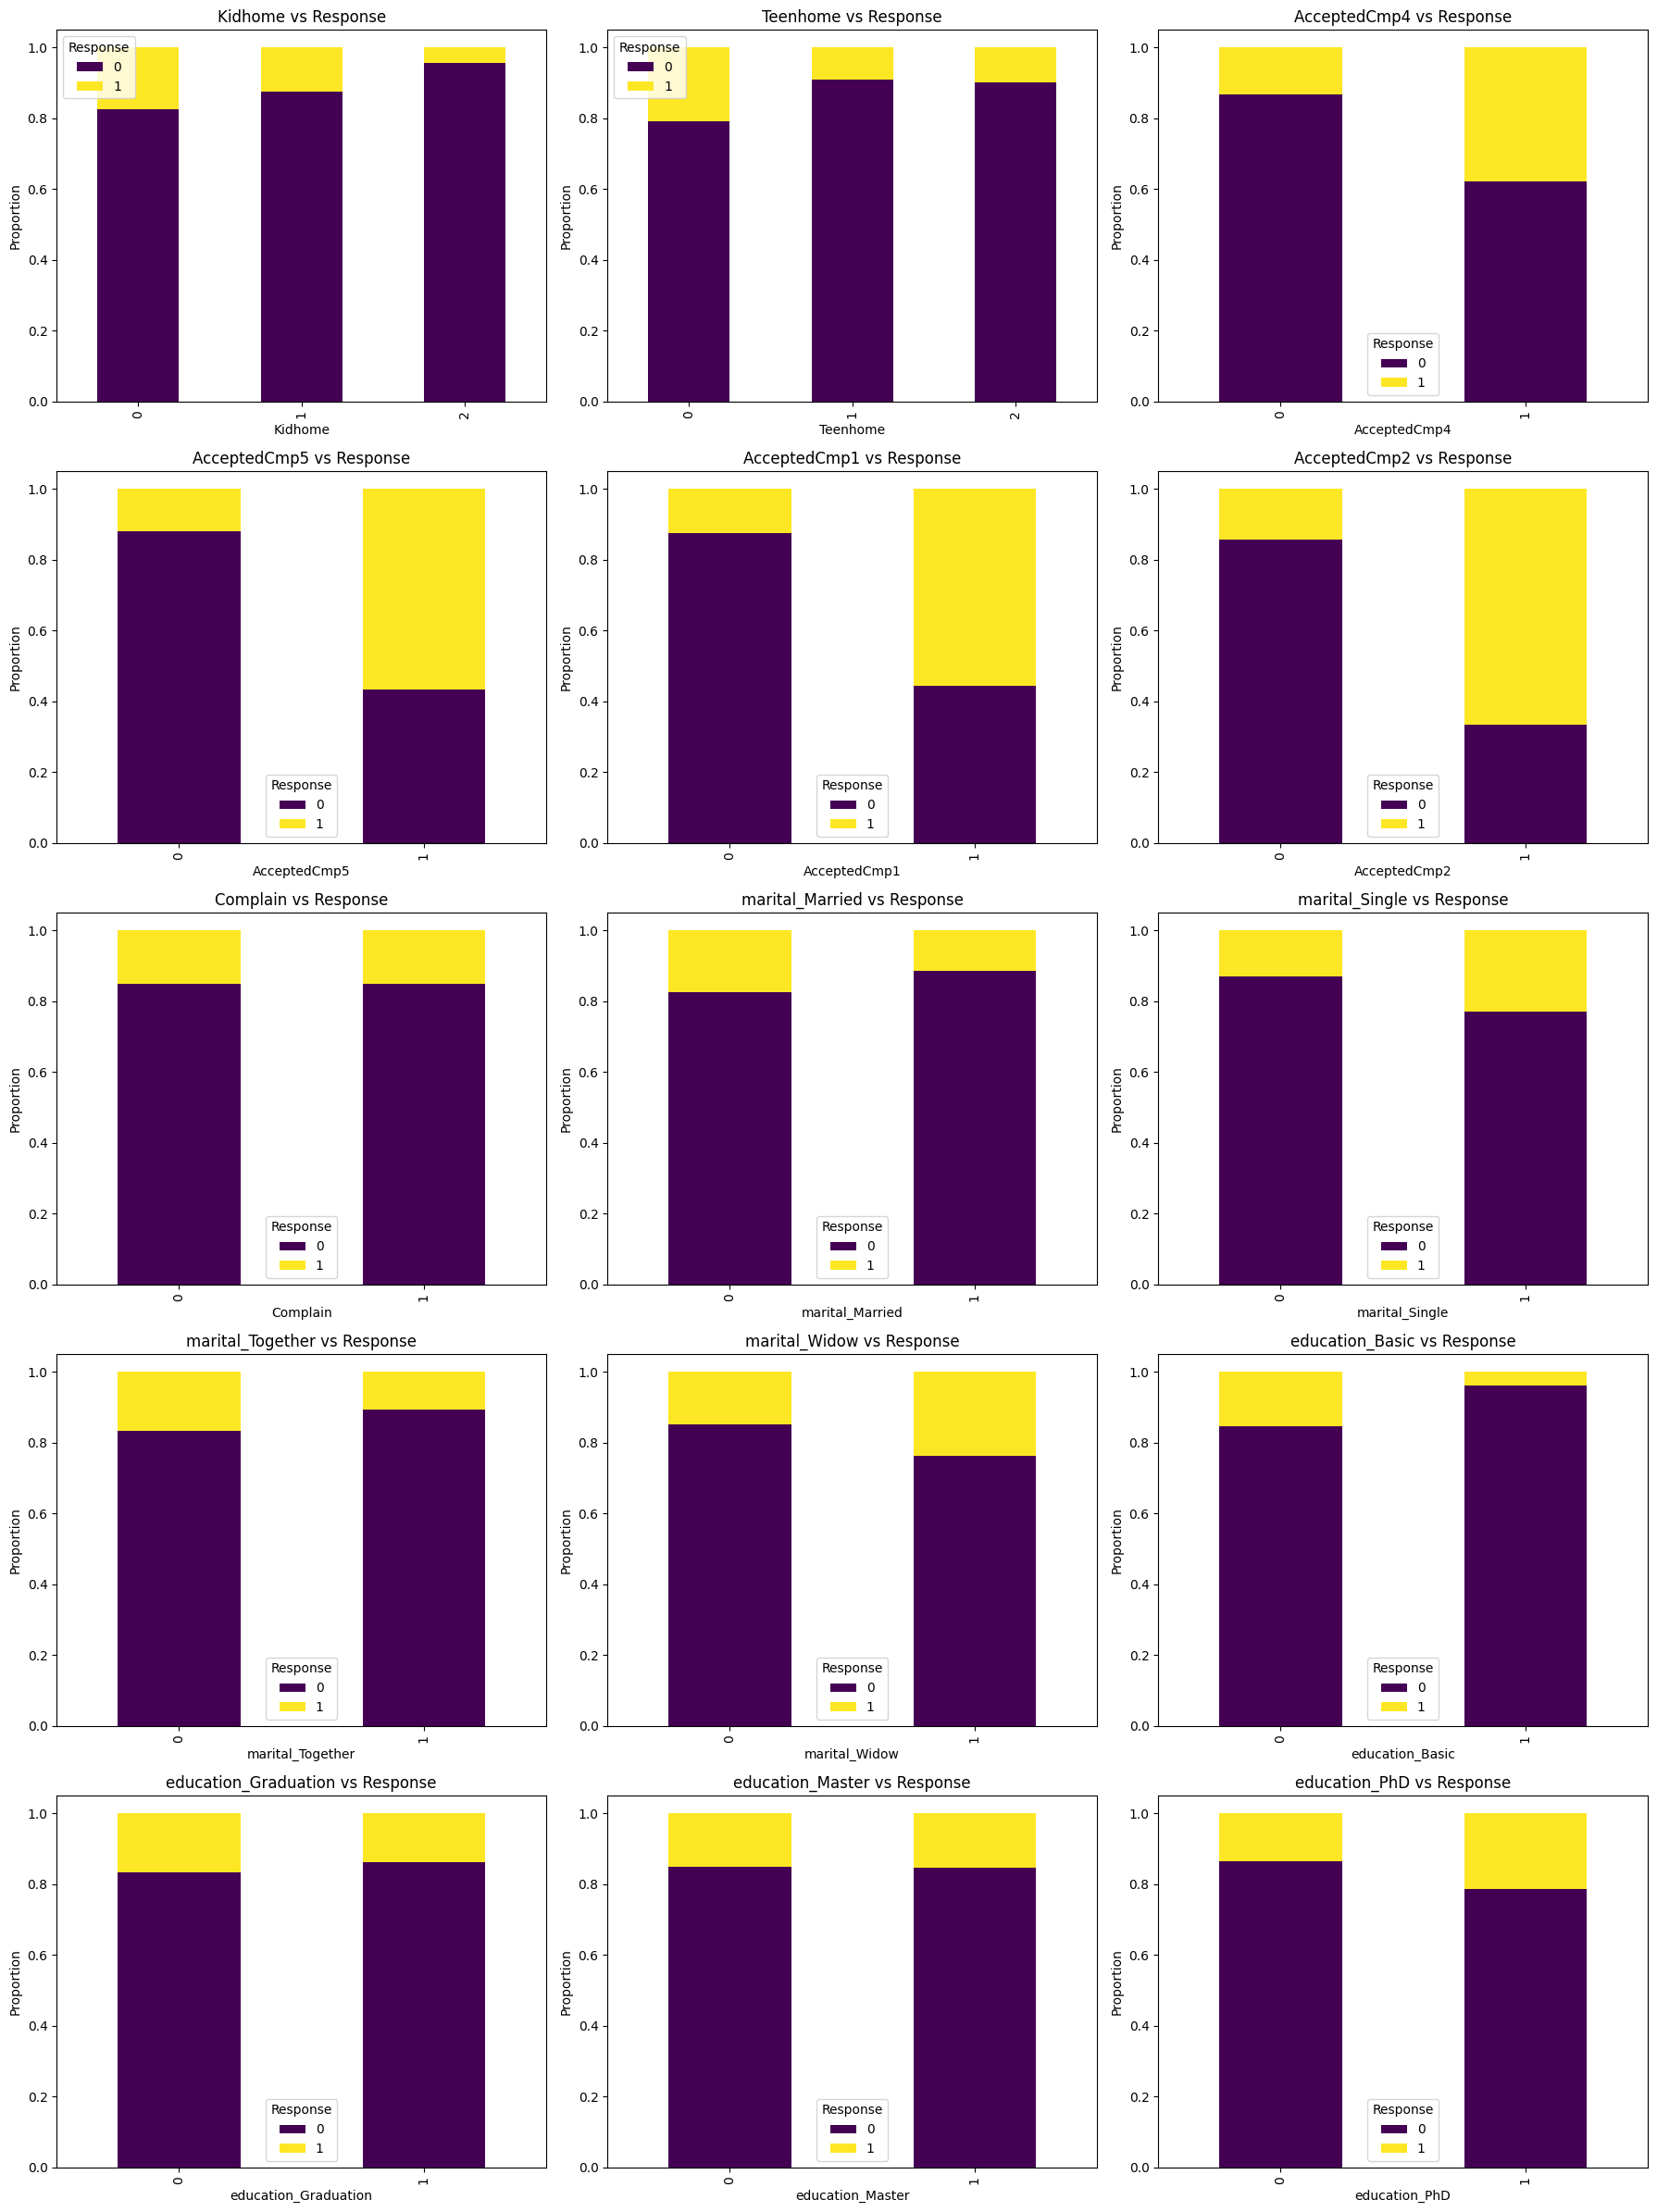

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]
    crosstab = pd.crosstab(data[column], data['Response'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
    ax.set_title(f'{column} vs Response')
    ax.set_xlabel(column)
    ax.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

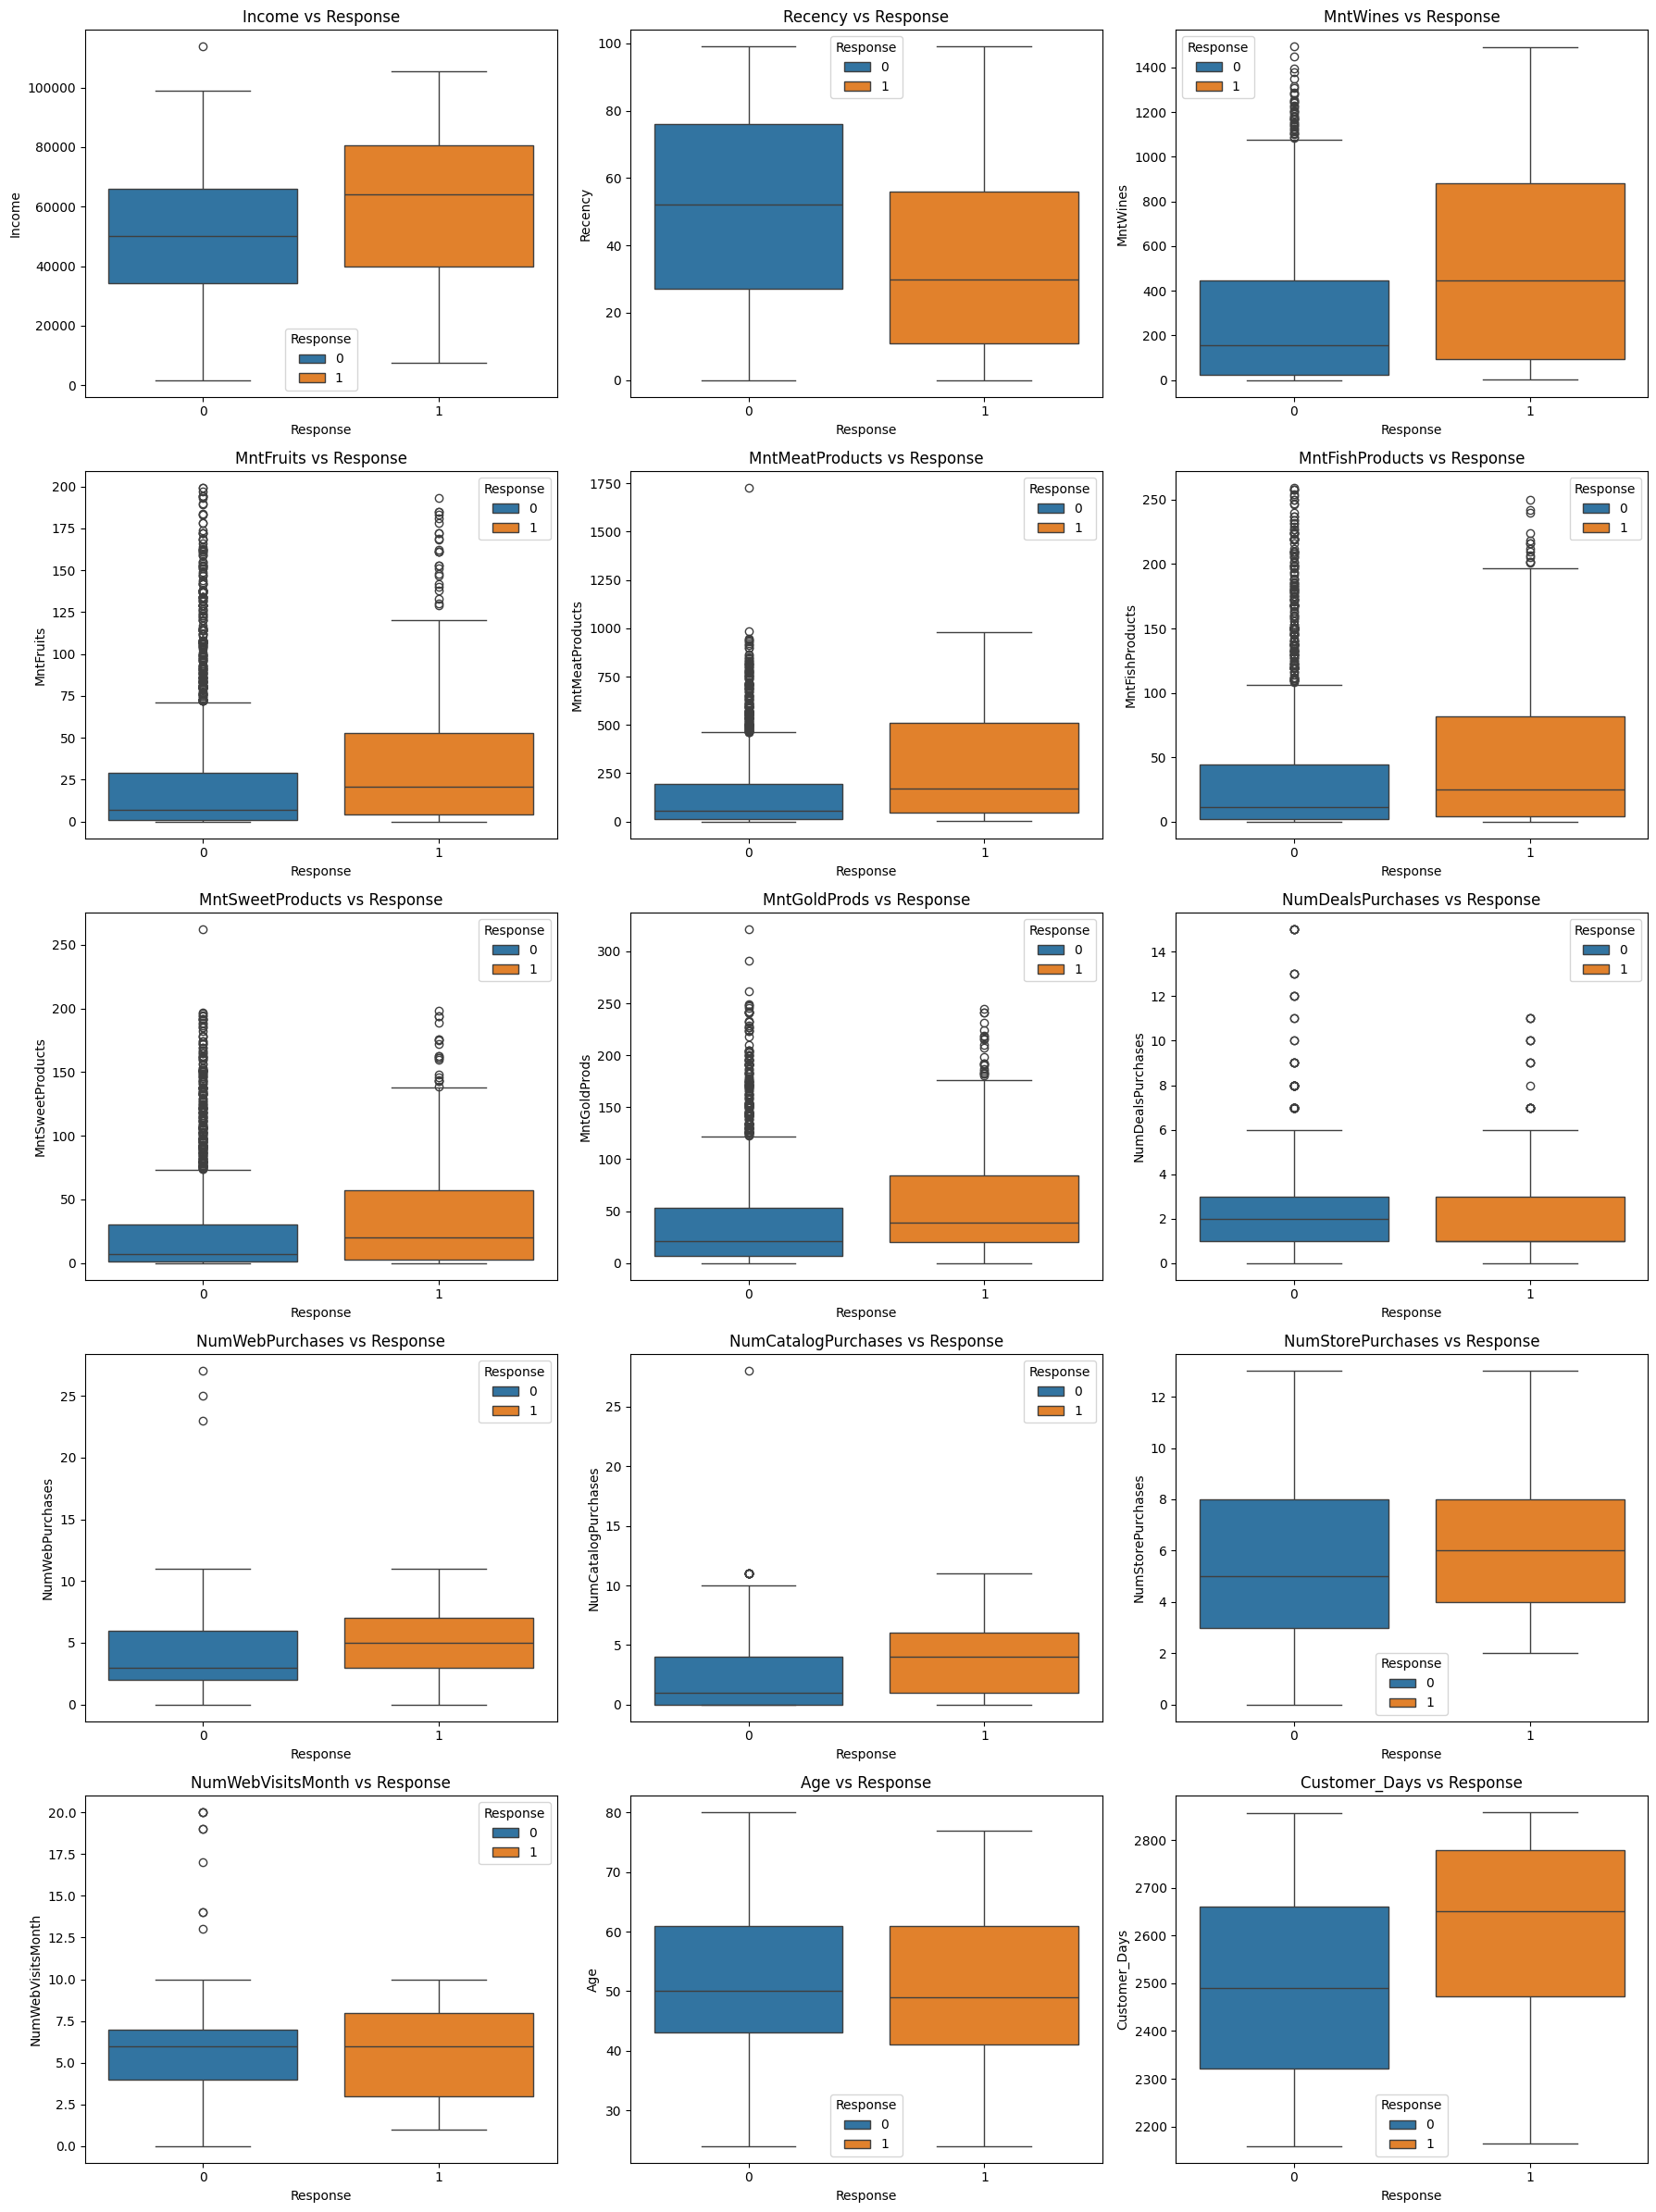

In [62]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(data=data, x='Response', y=column, ax=ax, hue ='Response')
    ax.set_title(f'{column} vs Response')
    ax.set_xlabel('Response')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

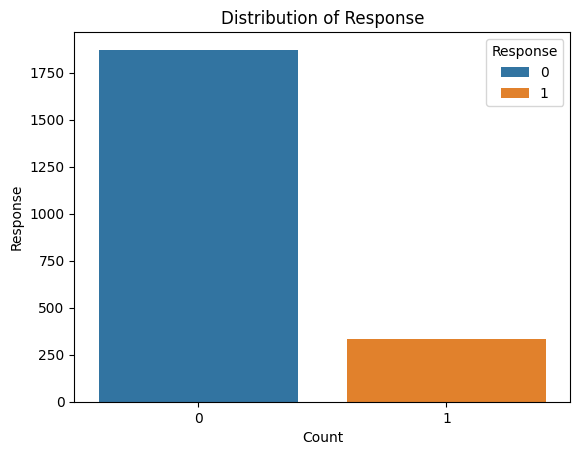

In [66]:
ax = sns.countplot(x=data.Response, hue = data.Response)
plt.title('Distribution of Response')
plt.xlabel('Count')
plt.ylabel('Response')

plt.show()

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [73]:
x = data.drop('Response', axis = 1)
y= data['Response']

x_smote, y_smote = SMOTE().fit_resample(x, y)

In [79]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


In [89]:
def base_classification(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.3, random_state = 42)

    models = {
        'MultinomialNB': MultinomialNB(),
        'GaussianNB': GaussianNB(),
        'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
        'SVC': SVC(random_state=42),
    }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        results[model_name] = {'Confusion Matrix': cm, 'Accurary': accuracy_score(y_test, y_pred)}
    return results

In [90]:
base_classification(x,y)

{'MultinomialNB': {'Confusion Matrix': array([[394, 173],
         [245, 312]]),
  'Accurary': 0.6281138790035588},
 'GaussianNB': {'Confusion Matrix': array([[424, 143],
         [238, 319]]),
  'Accurary': 0.6610320284697508},
 'DecisionTreeClassifier': {'Confusion Matrix': array([[470,  97],
         [ 82, 475]]),
  'Accurary': 0.8407473309608541},
 'SVC': {'Confusion Matrix': array([[468,  99],
         [342, 215]]),
  'Accurary': 0.6076512455516014}}

In [91]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [92]:
def ensemble_classification(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.3, random_state = 42)

    models = {
        'BaggingClassifier': BaggingClassifier(random_state=42),
        'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
        'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
        'RandomForestClassifier': RandomForestClassifier(random_state=42),
        'XGBClassifier': XGBClassifier(random_state=42),
        'XGBRFClassifier': XGBRFClassifier(random_state=42),
    }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        results[model_name] = {'Confusion Matrix': cm, 'Accurary': accuracy_score(y_test, y_pred)}
    return results

In [93]:
ensemble_classification(x,y)

{'BaggingClassifier': {'Confusion Matrix': array([[512,  55],
         [ 73, 484]]),
  'Accurary': 0.8861209964412812},
 'AdaBoostClassifier': {'Confusion Matrix': array([[499,  68],
         [ 57, 500]]),
  'Accurary': 0.8887900355871886},
 'GradientBoostingClassifier': {'Confusion Matrix': array([[504,  63],
         [ 48, 509]]),
  'Accurary': 0.9012455516014235},
 'RandomForestClassifier': {'Confusion Matrix': array([[526,  41],
         [ 38, 519]]),
  'Accurary': 0.9297153024911032},
 'XGBClassifier': {'Confusion Matrix': array([[525,  42],
         [ 41, 516]]),
  'Accurary': 0.9261565836298933},
 'XGBRFClassifier': {'Confusion Matrix': array([[500,  67],
         [ 83, 474]]),
  'Accurary': 0.8665480427046264}}

In [94]:
from sklearn.model_selection import cross_val_score


In [96]:
rfc_cv = cross_val_score(RandomForestClassifier(), x_smote,y_smote, cv=5).round(2)
gbc_cv = cross_val_score(GradientBoostingClassifier(), x_smote,y_smote, cv=5).round(2)
xgb_cv = cross_val_score(XGBClassifier(), x_smote,y_smote, cv=5).round(2)

CV_table1 = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'Gradient Boosting Classifier', 'XGBClassifier'],
    'Cross Val Score': [rfc_cv, gbc_cv, xgb_cv],
    'Average CV score': [np.mean(rfc_cv), np.mean(gbc_cv), np.mean(xgb_cv)],
    'Stdev CV score': [np.std(rfc_cv), np.std(gbc_cv), np.std(xgb_cv)]
})

CV_table1

,Model,Cross Val Score,Average CV score,Stdev CV score
0,Random Forest Classifier,"[0.81, 0.95, 0.95, 0.96, 0.95]",0.924,0.057131
1,Gradient Boosting Classifier,"[0.75, 0.93, 0.93, 0.95, 0.94]",0.900,0.075366
2,XGBClassifier,"[0.79, 0.95, 0.94, 0.96, 0.96]",0.920,0.065422


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.3, random_state = 0)

rfc = RandomForestClassifier().fit(x_train, y_train)

y_pred = rfc.predict(x_test)

accuracy_score(y_test, y_pred)

0.9403914590747331

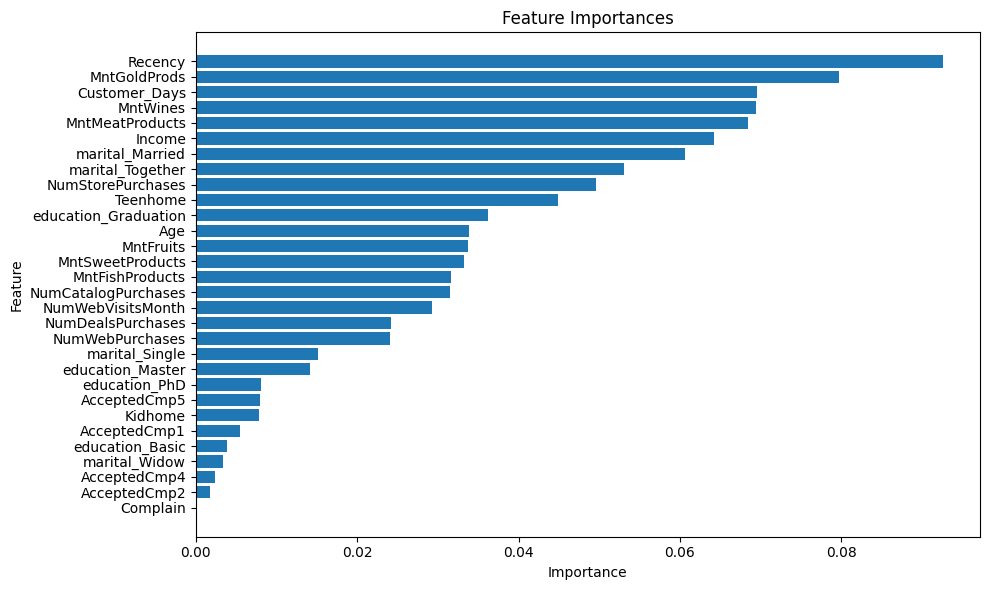

In [100]:
importances = rfc.feature_importances_

feature_names = list(x.columns)

indices = np.argsort(importances)[::1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(x.shape[1]), importances[indices], align="center")
plt.yticks(range(x.shape[1]), [feature_names[i] for i in indices])  # Rotate 90 degrees
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

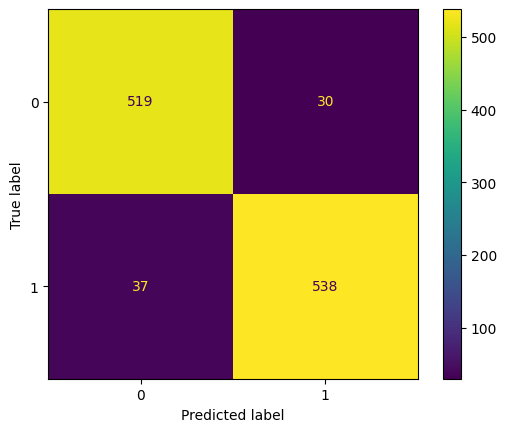

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

plt.show()